In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# MNISTデータの読み込み
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# データの前処理
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# モデルの構築
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# モデルの学習
model.fit(x_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1619 - accuracy: 0.9490 - val_loss: 0.0586 - val_accuracy: 0.9837
Epoch 2/5
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0503 - accuracy: 0.9841 - val_loss: 0.0387 - val_accuracy: 0.9892
Epoch 3/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0345 - val_accuracy: 0.9903
Epoch 4/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0424 - val_accuracy: 0.9870
Epoch 5/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.0310 - val_accuracy: 0.9912


In [2]:
cdcgan_img = np.load("cdcgan_imgs.npy")
cdcgan_label = np.load("cdcgan_labels.npy")

313/313 [==============================] - 2s 6ms/step - loss: 0.0324 - accuracy: 0.9912


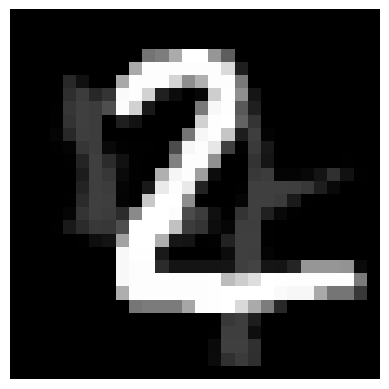

In [3]:
import random
#CDCGANの画像をノイズとして入力した場合
def cdcgan_attack(image, epsilon, data_grad):
    perturbed_image = image + epsilon * data_grad
    perturbed_image = np.clip(perturbed_image, 0, 1)
    return perturbed_image

def generate_cdcgan_examples(images, labels, epsilon=0.01):
    i = random.randint(0, 10000)
    x_noise=cdcgan_img[i]
    x_noise = np.expand_dims(x_noise, axis=0)
    adv_images = cdcgan_attack(images, epsilon, x_noise)

    return adv_images      # .numpy()メソッド不要

# テストデータに対する敵対的攻撃の実行
epsilon = 0.25
cdcgan_images = generate_cdcgan_examples(x_test, y_test, epsilon)

# 結果の可視化
plt.axis('off')
plt.imshow(np.squeeze(cdcgan_images[1]), cmap='gray') 

cdcgan_loss, cdcgan_acc =model.evaluate(cdcgan_images, y_test)  

313/313 [==============================] - 2s 6ms/step - loss: 0.0275 - accuracy: 0.9922


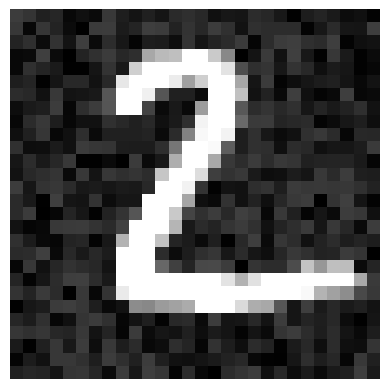

In [4]:
#ランダな画像をノイズとして入力した場合
def random_attack(image, epsilon, data_grad):
    perturbed_image = image + epsilon * data_grad
    perturbed_image = np.clip(perturbed_image, 0, 1)
    return perturbed_image

def generate_random_examples(images, labels, epsilon=0.01):
    x_noise=np.random.rand(28, 28, 1)
    x_noise = np.expand_dims(x_noise, axis=0)
    random_images = random_attack(images, epsilon, x_noise)

    return random_images      # .numpy()メソッド不要

# テストデーに対する敵対的攻撃の実行
epsilon = 0.25
random_images = generate_random_examples(x_test, y_test, epsilon)

# 結果の可視化
plt.axis('off')
plt.imshow(np.squeeze(random_images[1]), cmap='gray')  

random_loss, random_acc =model.evaluate(random_images, y_test)  

313/313 [==============================] - 2s 5ms/step - loss: 0.0463 - accuracy: 0.9863


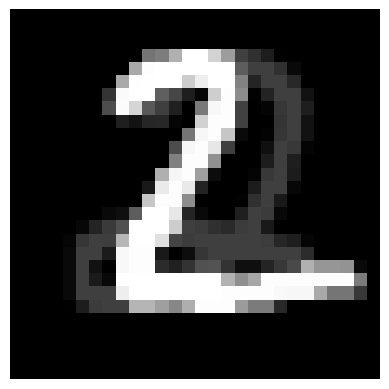

In [5]:
#本物の画像をノイズとして入力した場合
def real_attack(image, epsilon, data_grad):
    perturbed_image = image + epsilon * data_grad
    perturbed_image = np.clip(perturbed_image, 0, 1)
    return perturbed_image

def generate_real_examples(images, labels, epsilon=0.01):
    i = random.randint(0, 60000)
    x_noise=x_train[i]
    x_noise = np.expand_dims(x_noise, axis=0)
    real_images = real_attack(images, epsilon, x_noise)
    return real_images      # .numpy()メソッド不要

# テストデーに対する敵対的攻撃の実行
epsilon = 0.25
real_images = generate_real_examples(x_test, y_test, epsilon)

# 結果の可視化
plt.axis('off')
plt.imshow(np.squeeze(real_images[1]), cmap='gray')  

real_loss, real_acc =model.evaluate(real_images, y_test)  

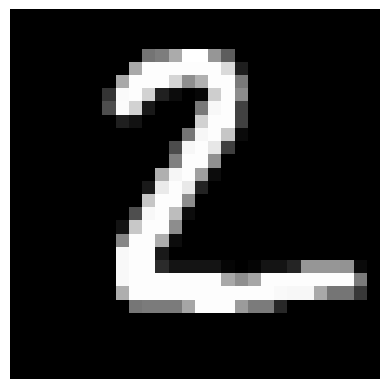

In [6]:
plt.axis('off')
plt.imshow((x_test[1]), cmap='gray')